In [38]:
from neurosynth.base.dataset import Dataset
from owlready2 import get_ontology
from neurosynth.analysis import meta
import nibabel as nib
import nilearn as nil
from nilearn import plotting

In [15]:
onto = get_ontology('./fma.owl')
onto.load()

def get_nodes(onto, main_label, labels=[]):
    for main in onto.search(label = main_label):
        subs = list(main.subclasses())
        while subs:
            subc = subs.pop(0)
            labels.append(subc.label[0])
            subs = subs + list(subc.subclasses())
    labels = list(dict.fromkeys(labels))
    return labels

def get_subclasses(onto, main_label, apply=None):
    subclasses = dict()
    for main in onto.search(label = main_label):
        subs = [main]
        while subs:
            subc = subs.pop(0)
            temp = list(subc.subclasses())
            if len(temp) > 0:
                subclasses[subc.label[0]] = [e.label[0] for e in temp]
                subs = subs + temp
    if apply is not None:
        subclasses = apply(subclasses)
    return subclasses

def parse_isSub(subc):
    subclass = []
    for k, v in subc.items():
        for elem in v:
            subclass.append((k, elem))
    return subclass

def get_synonyms(onto, main_label, apply=None):
    synonyms = dict()
    for main in onto.search(label = main_label):
        subs = [main]
        while subs:
            subc = subs.pop(0)
            temp = list(subc.subclasses())
            syn = subc.synonym
            if len(syn) > 0:
                synonyms[subc.label[0]] = syn
            subs = subs + temp
    if apply is not None:
        synonyms = apply(synonyms)
    return synonyms

def parse_isSyn(syn):
    syns = []
    for k, v in syn.items():
        for elem in v:
            syns.append((k, elem))
            syns.append((elem, k))
    return syns

nodes = get_nodes(onto, 'Anatomical entity')
subc = get_subclasses(onto, 'Anatomical entity', apply=parse_isSub)
syn = get_synonyms(onto, 'Anatomical entity', apply=parse_isSyn)

In [16]:
dataset = Dataset('database.txt')
dataset.add_features('features.txt')

In [42]:
ids = dataset.get_studies(features='frontal lobe*', frequency_threshold=0.001)

In [43]:
len(ids)

271

In [44]:
ma = meta.MetaAnalysis(dataset, ids)
ma.save_results('.', 'frontal_lobe')

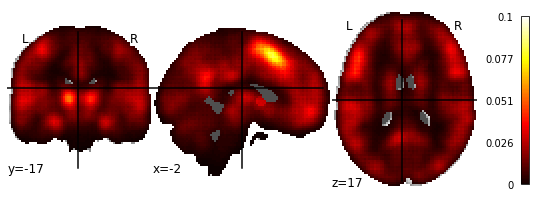

In [45]:
plotting.plot_stat_map('frontal_lobe_pA.nii.gz')

In [46]:
from neurolang.frontend.neurosynth_utils import NeuroSynthHandler

In [53]:
dataset = nsh.ns_load_dataset()
nsh = NeuroSynthHandler(ns_dataset=dataset)

In [54]:
nsh_data = nsh.ns_region_set_from_term('frontal lobe*')

In [59]:
nsh_data

{Region(VBR= affine:[[  -2.    0.    0.   90.]
  [   0.    2.    0. -126.]
  [   0.    0.    2.  -72.]
  [   0.    0.    0.    1.]], voxels:[[14 43 23]]),
 Region(VBR= affine:[[  -2.    0.    0.   90.]
  [   0.    2.    0. -126.]
  [   0.    0.    2.  -72.]
  [   0.    0.    0.    1.]], voxels:[[15 33 27]]),
 Region(VBR= affine:[[  -2.    0.    0.   90.]
  [   0.    2.    0. -126.]
  [   0.    0.    2.  -72.]
  [   0.    0.    0.    1.]], voxels:[[18 31 17]
  [18 31 19]
  [19 30 17]
  [19 30 18]
  [19 30 19]
  [19 31 17]
  [19 31 19]
  [19 32 17]
  [19 32 18]
  [19 32 19]
  [19 33 17]
  [19 33 18]
  [19 33 19]
  [20 31 18]
  [20 32 19]
  [20 33 18]
  [20 33 19]]),
 Region(VBR= affine:[[  -2.    0.    0.   90.]
  [   0.    2.    0. -126.]
  [   0.    0.    2.  -72.]
  [   0.    0.    0.    1.]], voxels:[[19 27 21]
  [20 27 20]
  [20 28 21]
  [20 28 22]
  [20 28 23]
  [20 29 21]]),
 Region(VBR= affine:[[  -2.    0.    0.   90.]
  [   0.    2.    0. -126.]
  [   0.    0.    2.  -72.]
  [ 